In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import compute_class_weight

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
df=pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depresion\clean_data.csv")

In [117]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
Vectorizer = TfidfVectorizer()

# Fit and transform the text data
dataVectorized = Vectorizer.fit_transform(df['message'])

# Get the feature names (words) in the order they appear in the matrix
feature_names = Vectorizer.get_feature_names()

# Convert the TF-IDF matrix to a Pandas DataFrame for easier inspection
df_tfidf = pd.DataFrame(dataVectorized.toarray(), columns=feature_names)

In [118]:
X=df_tfidf
y=df['result']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(X, df['result'], test_size=0.2,
                                                    stratify= df['result']  , random_state=0)

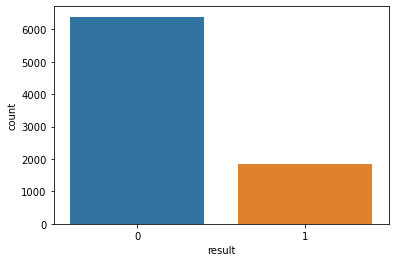

In [120]:
sns.countplot(x=y_train)
plt.show()

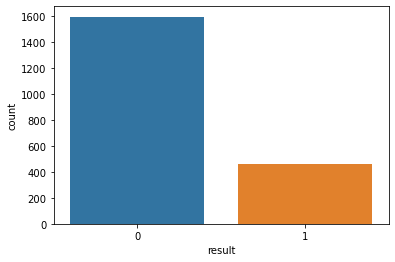

In [121]:
sns.countplot(x=y_test)
plt.show()

In [122]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8233, 14869), (8233,), (2059, 14869), (2059,))

In [123]:
from sklearn.utils import compute_class_weight

# Assuming df_tar['result'] contains your target variable
unique_classes = np.unique(df['result'])
class_weights = compute_class_weight("balanced", classes=unique_classes, y=df['result'])
class_weights_dict = dict(zip(unique_classes, class_weights))

print(class_weights_dict)


{0: 0.6445390781563126, 1: 2.229636048526863}


In [124]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

## logistic regression

In [125]:
lr = LogisticRegression(class_weight=class_weights_dict)

In [126]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.6445390781563126, 1: 2.229636048526863})

In [127]:
Train_lrScore = lr.score(X_train, y_train)

In [128]:
print(f'Train Accuracy score of Logistic Regression is : {round(Train_lrScore * 100 ,2)}%')

Train Accuracy score of Logistic Regression is : 99.78%


In [129]:
Test_lrScore = lr.score(X_test, y_test)

In [130]:
print(f'Test Accuracy score for Logistic Regression is : {round(Test_lrScore * 100 ,2)}%')

Test Accuracy score for Logistic Regression is : 99.56%


In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [132]:
lrPreds = lr.predict(X_test)

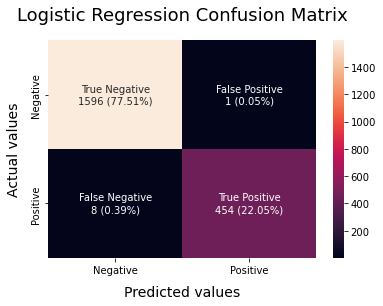

In [133]:
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

In [134]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1597
         Yes       1.00      0.98      0.99       462

    accuracy                           1.00      2059
   macro avg       1.00      0.99      0.99      2059
weighted avg       1.00      1.00      1.00      2059



## decision tree

In [135]:
dt = DecisionTreeClassifier(class_weight=class_weights_dict)

In [136]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6445390781563126,
                                     1: 2.229636048526863})

In [137]:
Train_dtScore = dt.score(X_train, y_train)

In [138]:
print(f'\nDecision Tree Train Accuracy score is : {round(Train_dtScore * 100 , 2)}%')


Decision Tree Train Accuracy score is : 99.99%


In [139]:
Test_dtScore = dt.score(X_test, y_test)


In [140]:
print(f'\nDecision Tree Test Accuracy score is : {round(Test_dtScore * 100 , 2)}%')


Decision Tree Test Accuracy score is : 99.66%


In [141]:
dtPreds = dt.predict(X_test)

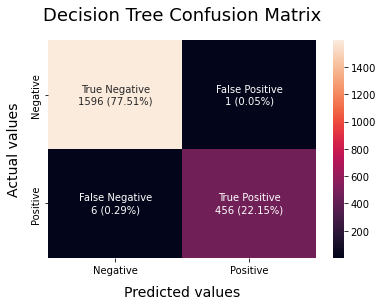

In [142]:
makeCM_Matrix(confusion_matrix(y_test, dtPreds), 'Decision Tree')

In [113]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, dtPreds, target_names=['No','Yes'])
print('Decision Tree Classification Report: \n',classification_report)

Decision Tree Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1597
         Yes       1.00      0.99      0.99       462

    accuracy                           1.00      2059
   macro avg       1.00      0.99      1.00      2059
weighted avg       1.00      1.00      1.00      2059



In [143]:
import pickle


In [145]:
with open("model_and_vectorizer.pkl", "wb") as model_file:
    pickle.dump((dt, Vectorizer), model_file)

In [150]:
# Load the model and vectorizer
with open("model_and_vectorizer.pkl", "rb") as model_file:
    loaded_model, loaded_tfidf_vectorizer = pickle.load(model_file)

In [151]:
def remove_url(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

def remove_pun(text):
    res = text.replace(r'[^\w\s]+', '')
    return res


#removing emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)



def remove_stopwords(text):
    StopWords=set(stopwords.words('english'))
    result= " ".join([word for word in text.split() if word not in StopWords])
    return result

def lemmatize_(text):
    lem=nltk.stem.wordnet.WordNetLemmatizer()
    result = " ".join([lem.lemmatize(word) for word in text.split()])
    return result

def stem_(text):
    stemmer=PorterStemmer()
    result = " ".join([stemmer.stem(word) for word in text.split()])
    return result


def cleanData(text):
    # Remove repeating characters from tokens
    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] ) 
    # Remove tokens containing digits
    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) 
    # Remove tokens containing underscore
    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] )
    # Remove tokens containing Special Characters
    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) 
    # Remove tokens less than 2 characters
    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  


In [152]:
def process(inp):
    inp=remove_emoji(inp)
    inp=remove_url(inp)
    inp=remove_stopwords(inp)
    inp=remove_pun(inp)
    inp=lemmatize_(inp)
    inp=stem_(inp)
    inp=cleanData(inp)
    inputToModel = loaded_tfidf_vectorizer.transform([inp]).toarray()
    return inputToModel
    
    

In [153]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = process(input_text) #preprocess the text 
    predict = loaded_model.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [162]:
app("@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. ")

Input :  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. 
Output :  0


In [157]:
app('Depression is like a war. You either win or you die trying.')

Input :  Depression is like a war. You either win or you die trying.
Output :  1


In [165]:
app("i had terrible day")

Input :  i had terrible day
Output :  0
